##**Defining the Question**

The research problem is to create a null hypothesis from Autolib dataset and do a testing to either accept or reject the hypothesis



**a) Specifying the Question**

Does the difference in the means of blue cars taken in random postal codes equivalent to 0 or not?



**b) Defining the Metric for Success**

Introduce the data you will be describing and the random variable that you are investigating. 

State very precisely the null and alternate hypothesis that you will be testing. 

Provide some explanation for why this hypothesis is important and/or interesting. 

Areas to be covered to achieve the question objectives:

1) Exploratory Data Analysis

2)Visualizations

3)Hypothesis testing



**c) Understanding the context**

Overview

Hypothesis testing will be conducted. The significance level which is 0.5 will be compared to the P-Value,from 

If :
P-Value < Significance level, null hypothesis will be accepted

or 

P-Value > Significance level, null hypothesis will be rejected

The dataset and glossary to use for this project can be found here [http://bit.ly/DSCoreAutolibDataset] and here [Link] respectively.

The provided dataset is a daily aggregation, by date and postal code, of the number of events on the Autolib network (car-sharing and recharging).


##**Load required libraries**

In [0]:
#Import Pandas library
import pandas as pd
import pandas_profiling as pp

#Import numpy library
import numpy as np

#Import seaborn library
import seaborn as sns

#Import Pandas library
import matplotlib.pyplot as plt

%matplotlib inline

#Import scipy libraries
from scipy import stats

from scipy.stats import norm

from scipy.stats import t

import math

from scipy.stats import ttest_ind

from statsmodels.stats import weightstats as stests

# Supress unnecessary warnings so that presentation looks clean
import warnings
warnings.filterwarnings("ignore")

###**Data dictionary**

In [2]:
#Load the data dictionary
dictionary = pd.read_excel('columns_explanation.xlsx')
dictionary

,Column name,explanation
0,Postal code,postal code of the area (in Paris)
1,date,date of the row aggregation
2,n_daily_data_points,number of daily data poinst that were availabl...
3,dayOfWeek,identifier of weekday (0: Monday -> 6: Sunday)
4,day_type,weekday or weekend
5,BlueCars_taken_sum,Number of bluecars taken that date in that area
6,BlueCars_returned_sum,Number of bluecars returned that date in that ...
7,Utilib_taken_sum,Number of Utilib taken that date in that area
8,Utilib_returned_sum,Number of Utilib returned that date in that area
9,Utilib_14_taken_sum,Number of Utilib 1.4 taken that date in that area


In [0]:
#Load Autolib dataset
data = pd.read_csv('autolib_daily_events_postal_code.csv')


##**Preview Dataset**

In [0]:
#Load first five rows
data.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [0]:
#Load last five rows
data.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


##**Assess infomation about the dataset**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
Postal code               16085 non-null int64
date                      16085 non-null object
n_daily_data_points       16085 non-null int64
dayOfWeek                 16085 non-null int64
day_type                  16085 non-null object
BlueCars_taken_sum        16085 non-null int64
BlueCars_returned_sum     16085 non-null int64
Utilib_taken_sum          16085 non-null int64
Utilib_returned_sum       16085 non-null int64
Utilib_14_taken_sum       16085 non-null int64
Utilib_14_returned_sum    16085 non-null int64
Slots_freed_sum           16085 non-null int64
Slots_taken_sum           16085 non-null int64
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


As seen above, the date column has to be converted to a datetime type column

In [0]:
#Convert date type to datetime
data["date"]= pd.to_datetime(data["date"]) 

In [6]:
#Confirm if date column has been changed.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
Postal code               16085 non-null int64
date                      16085 non-null datetime64[ns]
n_daily_data_points       16085 non-null int64
dayOfWeek                 16085 non-null int64
day_type                  16085 non-null object
BlueCars_taken_sum        16085 non-null int64
BlueCars_returned_sum     16085 non-null int64
Utilib_taken_sum          16085 non-null int64
Utilib_returned_sum       16085 non-null int64
Utilib_14_taken_sum       16085 non-null int64
Utilib_14_returned_sum    16085 non-null int64
Slots_freed_sum           16085 non-null int64
Slots_taken_sum           16085 non-null int64
dtypes: datetime64[ns](1), int64(11), object(1)
memory usage: 1.6+ MB


In [7]:
data.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


In [8]:
# Preview the data shape
data.shape

(16085, 13)

Our dataset has 16085 rows and 13 columns

In [9]:
# Summary of the dataset
report = pp.ProfileReport(data)
report

Number of variables,13
Number of observations,16085
Total Missing (%),0.0%
Total size in memory,1.6 MiB
Average record size in memory,104.0 B
Numeric,5
Categorical,1
Boolean,0
Date,1
Text (Unique),0
Rejected,6


##**Clean the dataset**

In [10]:
#Check column names in the dataset
data.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [11]:
##cleaning data using strip(),lower(), replace()
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
print(data.columns)

Index(['postal_code', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')


In [12]:
#Renaming the columns 
data.rename(columns={'dayofweek':'day_of_week'}, inplace = True)
data.columns

Index(['postal_code', 'date', 'n_daily_data_points', 'day_of_week', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

##**Missing values**

In [13]:
#Checking if there are missing values in the dataset
data.isnull().sum()

postal_code               0
date                      0
n_daily_data_points       0
day_of_week               0
day_type                  0
bluecars_taken_sum        0
bluecars_returned_sum     0
utilib_taken_sum          0
utilib_returned_sum       0
utilib_14_taken_sum       0
utilib_14_returned_sum    0
slots_freed_sum           0
slots_taken_sum           0
dtype: int64

The dataset has no null values

##**Anomalies**

In [14]:
#Check if dataset has duplicates
data_duplicate = data[data.duplicated()]
data_duplicate.sum()


postal_code               0.0
date                      0.0
n_daily_data_points       0.0
day_of_week               0.0
day_type                  0.0
bluecars_taken_sum        0.0
bluecars_returned_sum     0.0
utilib_taken_sum          0.0
utilib_returned_sum       0.0
utilib_14_taken_sum       0.0
utilib_14_returned_sum    0.0
slots_freed_sum           0.0
slots_taken_sum           0.0
dtype: float64

No duplicates found in the dataset

### **Note**
We will be using blue cars for this analysis

---


 



In [0]:
#Dropping columns I will not need for this analysis
#We will be dealing with Blue cars perfomance only.
data.drop(['utilib_taken_sum', 'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum'], axis = 1, inplace = True)


In [16]:
#Confirming that the columns have been dropped.
data.columns

Index(['postal_code', 'date', 'n_daily_data_points', 'day_of_week', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'slots_freed_sum',
       'slots_taken_sum'],
      dtype='object')

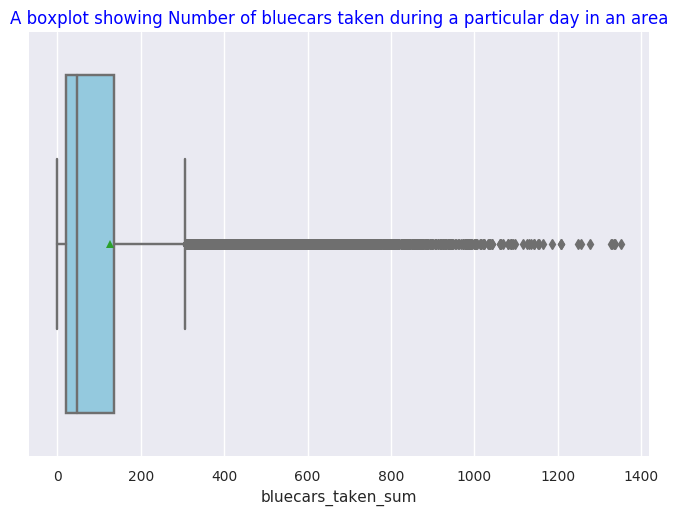

In [38]:
#Checking outliers using boxplots
sns.boxplot(x=data['bluecars_taken_sum'],showmeans= True, color = 'skyblue')
plt.title("A boxplot showing Number of bluecars taken during a particular day in an area", color = 'Blue')
plt.show()

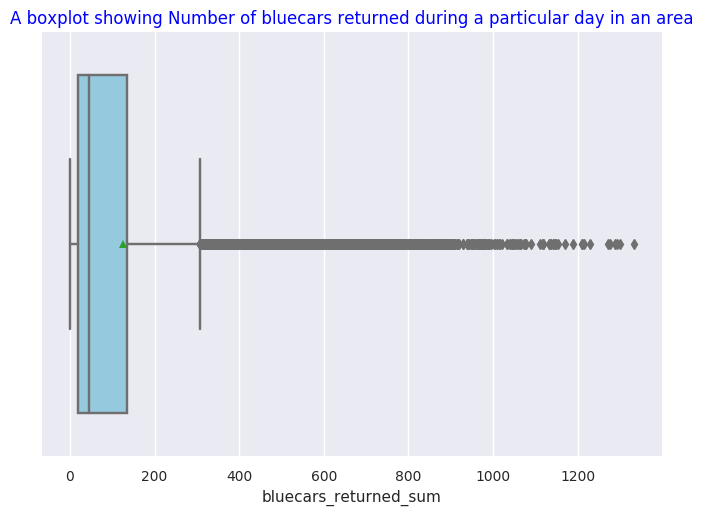

In [36]:
plt.figure(dpi = 100)
sns.boxplot(data['bluecars_returned_sum'], showmeans = True , color = 'skyblue')
plt.title("A boxplot showing Number of bluecars returned during a particular day in an area", color = 'Blue')
plt.show()

From the boxplot above, there are alot of outliers. For our case, we choose to use them and see how it affects the analysis

##**Univariate Analysis**

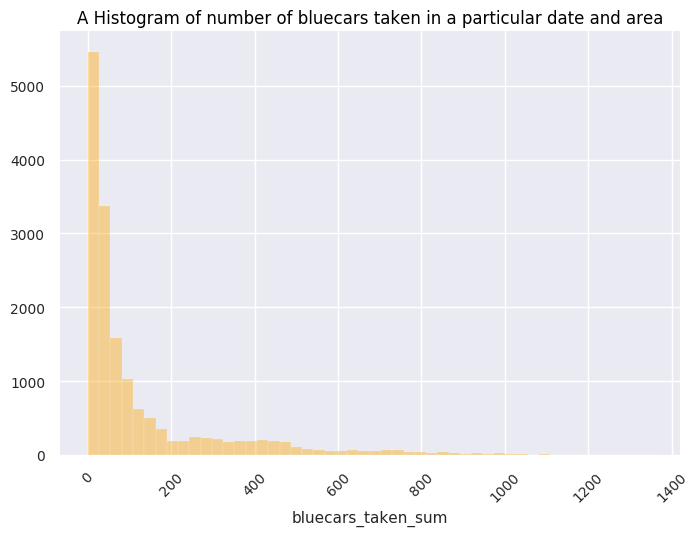

In [19]:
plt.figure(dpi = 100)
sns.set_style("darkgrid")
sns.distplot(data["bluecars_taken_sum"], kde = False, color = 'orange')
plt.title("A Histogram of number of bluecars taken in a particular date and area", color = 'black')
plt.xticks(rotation = 45)
plt.show()





The histogram  above shows  that the blue cars taken distribution is skewed to the right.This is because the frequency moves to the right(tail is long to the right and the mean is less than the mode..This is called negative skweness.



In a perfect normal distribution, the tails on either side of the curve are exact mirror images of each other.



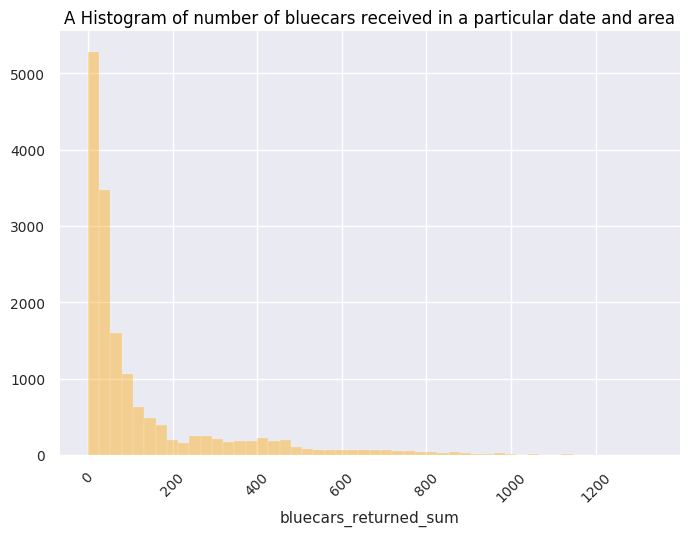

In [20]:
plt.figure(dpi = 100)
sns.set_style("darkgrid")
sns.distplot(data["bluecars_returned_sum"], kde = False, color = 'orange')
plt.title("A Histogram of number of bluecars received in a particular date and area", color = 'black')
plt.xticks(rotation = 45)
plt.show()

The histogram above shows that the blue cars received distribution is skewed to the right.This is because the frequency moves to the right(tail is long to the right and the mean is less than the mode..This is called negative skweness.

In [21]:
data.columns

Index(['postal_code', 'date', 'n_daily_data_points', 'day_of_week', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'slots_freed_sum',
       'slots_taken_sum'],
      dtype='object')

In [0]:
# Converting the day of week from from numericals to strings for plotting
# This is done using the mapping function
# 

data['day_of_week'] = data.day_of_week.map({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday'})

###**Pie chart**

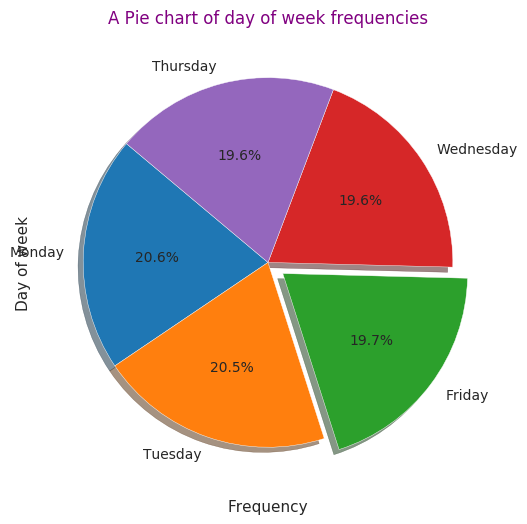

In [24]:
# Counting the day of week values
day2 = data.day_of_week.value_counts()
day2

# accessing the data to plot

# Creating our labels
sizes2= day2.index
sizes2

# Creating our values
data2 = day2.values
data2



plt.figure(figsize = (6,6), dpi = 100)
plt.pie(data2, labels = sizes2, autopct = '%1.1f%%', shadow = True, explode = (0,0,0.1,0,0), startangle = 140)
plt.ylabel("Day of week")
plt.xlabel('Frequency')
plt.title("A Pie chart of day of week frequencies", color = 'purple')
plt.show()

From the pie chart above, Mondays are the most days used for receiving and taking blue cars

##**Analysis**

In [25]:
# Frequency table showing sum of bluecars taken by day of week in ascending order.

data.groupby('day_of_week')['bluecars_taken_sum'].sum().sort_values()

day_of_week
Wednesday    261849
Tuesday      261940
Thursday     263207
Monday       263893
Friday       288546
Name: bluecars_taken_sum, dtype: int64

In [27]:
# Frequency table showing sum of charging slots released by day of week in ascending order.

data.groupby('day_of_week')['slots_freed_sum'].sum().sort_values()


day_of_week
Monday       47022
Tuesday      47095
Wednesday    47331
Thursday     48200
Friday       52143
Name: slots_freed_sum, dtype: int64

##**Measures of central Tendency**

**This is the Mean or average of the data i.e. a number around which a whole data is spread out.**


In [30]:

# Calculate and Display the mean by column

cols = [ 'bluecars_taken_sum', 'bluecars_returned_sum','n_daily_data_points', 'slots_freed_sum',
       'slots_taken_sum']



for column in cols:
  print("\n")
  print('The average ' + column + ' is : ' + str(data[column].mean()))




The average bluecars_taken_sum is : 125.92695057506994


The average bluecars_returned_sum is : 125.912713708424


The average n_daily_data_points is : 1431.3306185887473


The average slots_freed_sum is : 22.62903326080199


The average slots_taken_sum is : 22.629281939695367


**The mode of a set of data values is the value that appears most often.**

In [31]:
# Calculate and Display the mode by column

cols = [ 'bluecars_taken_sum', 'bluecars_returned_sum','n_daily_data_points', 'slots_freed_sum',
       'slots_taken_sum']



for column in cols:
  print("\n")
  print('The average ' + column + ' is : ' + str(data[column].mode()))



The average bluecars_taken_sum is : 0    12
dtype: int64


The average bluecars_returned_sum is : 0    13
dtype: int64


The average n_daily_data_points is : 0    1440
dtype: int64


The average slots_freed_sum is : 0    0
dtype: int64


The average slots_taken_sum is : 0    0
dtype: int64


 **Median is  a value or quantity lying at the midpoint of a frequency distribution of observed values or quantities.**

In [32]:
# Calculate and Display the median by column


for column in cols:
  print("\n")
  print('The average ' + column + ' is : ' + str(data[column].median()))



The average bluecars_taken_sum is : 46.0


The average bluecars_returned_sum is : 46.0


The average n_daily_data_points is : 1440.0


The average slots_freed_sum is : 0.0


The average slots_taken_sum is : 0.0


**Variance is the expectation of the squared deviation of a random variable from its mean.**

In [34]:
## Calculate and Display the variance by column
for column in cols:
  print('\n')
  print('The Variance of ' + column + ', is :  ' + str(data[column].var()))



The Variance of bluecars_taken_sum, is :  34383.01611333789


The Variance of bluecars_returned_sum, is :  34410.819413706275


The Variance of n_daily_data_points, is :  1103.0402742072456


The Variance of slots_freed_sum, is :  2716.52185037856


The Variance of slots_taken_sum, is :  2719.2084312501315


**Standard deviation is a measure of the amount of variation or dispersion of a set of values**

In [73]:
#Calculate the standard deviation
for column in cols:
  print('\n')
  print('The Variance of ' + column + ', is :  ' + str(data[column].std()))



The Variance of bluecars_taken_sum, is :  185.42657876727893


The Variance of bluecars_returned_sum, is :  185.50153480148427


The Variance of n_daily_data_points, is :  33.21205013556443


The Variance of slots_freed_sum, is :  52.12026333757879


The Variance of slots_taken_sum, is :  52.146029870452566


**Skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean.**

In [72]:
#Calculate the skewness
for column in cols:
  print('\n')
  print('The Variance of ' + column + ', is :  ' + str(data[column].skew()))



The Variance of bluecars_taken_sum, is :  2.4063548974959086


The Variance of bluecars_returned_sum, is :  2.412084978838923


The Variance of n_daily_data_points, is :  -5.742776211517434


The Variance of slots_freed_sum, is :  2.5974057870090994


The Variance of slots_taken_sum, is :  2.5969043474634987


##**Bivariate analysis**

This is the analysis of two variables. In our dataset, I use blucars taken against bluecars received.

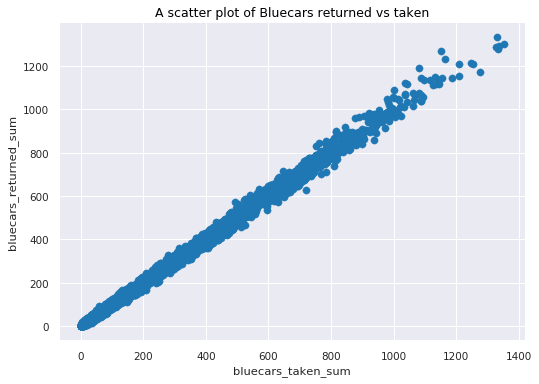

In [43]:
# Specifying the chart size

plt.figure(dpi = 75)

# plotting our scatterplot using matplotlib
plt.scatter(data['bluecars_taken_sum'], data['bluecars_returned_sum'])

# Giving the scatterplot a title
plt.title('A scatter plot of Bluecars returned vs taken', color = 'black')

# Labelling the x axis
plt.xlabel('bluecars_taken_sum')

# Labelling the y axis
plt.ylabel('bluecars_returned_sum')

# We then display our scatterplot 
plt.show()



The scatter plot shows that there is positive correlation. An increase in bluecars returned increases the rate at which bluecars are taken from the different postal stations.

##**Sampling**

###**Simple Random sampling**

This is a sample is a subset of individuals chosen from a larger set. Each individual is chosen randomly and entirely by chance, such that each individual has the same probability

In [47]:
# creating a new dataframe containing our simple random sample 
# Let us make our sample size = 5000
# The sample will be selected without replacement

#Original data shape
print(data.shape)
print('*************************************************')
sample_data = data.sample(n = 5000, replace = 'False')
#New sample data shape
print(sample_data.shape)

(16085, 9)
*************************************************
(5000, 9)


##**Correlation**

This is any statistical association, though it commonly refers to the degree to which a pair of variables are linearly related.

Positive correlation is a relationship between two variables in which both variables move in the same direction.

Negative correlation/ inverse correlation is a relationship between two variables whereby they move in opposite directions.

Correlation coefficients between -/+0.7 to -/+0.9 are generally considered strong,

Between -/+0.4 to -/+ 0.6 are considered moderate,

-/+0.1 to -/+0.3 are considered weak.

In [50]:
#Calculating the pearson corr between two selected variables
pearson_coeff = data["bluecars_taken_sum"].corr(data["bluecars_returned_sum"], method="pearson") 
print(pearson_coeff)

# Checking whether you have to define the pearson
coeff = data["bluecars_taken_sum"].corr(data["bluecars_returned_sum"]) 
print(coeff)

0.9986597051672199
0.9986597051672199


The two variables have a strong positive correlation

##**Hypothesis testing**

**Hypothesis Testing** - This is a systematic way to select samples from a group or population with the intent of making a determination about the expected behavior of the entire group.

**The null hypothesis** -  This is a statement about the population that either is believed to be true or is used to put forth an argument unless it can be shown to be incorrect beyond a reasonable doubt.

**The alternative hypothesis**- This is a claim about the population that is contradictory to the null hypothesis and what we conclude when we reject the null hypothesis.

**Test statistic**- This is a value computed from sample data and is used to help us decide whether to either accept or reject the null hypothesis.

**p-value**-  This is the probability of getting the observed results of a test, assuming that the null hypothesis is true.

**Type 1 Error** -  An error that occurs when the sample results lead to rejection of the null hypothesis when in reality it is true.

**Type II Error** -  An error that occurs when the sample results lead to acceptance of the null hypothesis when it false

**Confidence Level / Level of Confidence** - It represents how certain we are in our decision. It is normally expressed as a percentage.

**Power of a test** - This is the probability of rejecting the null hypothesis given that it is false.

**Critical area of distribution** - This is the region that represents the rejection of the null hypothesis. This means that when our calculated p values fall in this region, we can decide to reject the null hypothesis

 

In [57]:
# Selecting two postal codes using simple random sampling

hypothesis_sample = sample_data.sample(n = 2, replace = False)
hypothesis_sample

,postal_code,date,n_daily_data_points,day_of_week,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
9337,92420,2018-06-14,1439,Thursday,weekday,10,10,0,0
318,75003,2018-01-07,1440,NaN,weekend,283,293,84,87


**My hypothesis**

**Ho** = The postal code chosen represents  that the difference in the means of blue cars taken in postal code 75003 and 92420 is  0.

**H1**  != The postal code chosen represents  that the difference in the means of blue cars taken in postal code 75003 and 92420 is  0.

First, create a dataframe with postal code 75003 and 92420

In [70]:
y1 = sample_data[sample_data['postal_code'] == 75003]
y1.head()

,postal_code,date,n_daily_data_points,day_of_week,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
344,75003,2018-02-02,1440,Friday,weekday,262,274,64,60
377,75003,2018-03-10,1440,NaN,weekend,412,414,89,92
409,75003,2018-04-11,1439,Wednesday,weekday,193,187,69,68
371,75003,2018-03-04,1440,NaN,weekend,286,297,71,72
361,75003,2018-02-19,1420,Monday,weekday,191,184,56,55


In [69]:
y2 = sample_data[sample_data['postal_code'] == 92420]
y2.head()

,postal_code,date,n_daily_data_points,day_of_week,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
9342,92420,2018-06-19,1370,Tuesday,weekday,0,1,0,0
9249,92420,2018-03-07,1440,Wednesday,weekday,16,15,0,0
9340,92420,2018-06-17,1440,NaN,weekend,14,13,0,0
9318,92420,2018-05-26,1440,NaN,weekend,18,18,0,0
9298,92420,2018-04-25,1440,Wednesday,weekday,9,11,0,0


In [71]:
# Calculate z-test
# Assume level of significance = 0.5

# Calculating the test statistic

ztest , pval1 = stests.ztest(x1['bluecars_taken_sum'], x2 = y2['bluecars_taken_sum'], value=0, alternative='two-sided')

print(float(pval1))

if pval1 < 0.05:
    print("Failed to accept null hypothesis")
else:
    print("Failed to reject null hypothesis")

9.209304796116461e-163
Failed to accept null hypothesis


The p-value is not less than 0.05 hence we fail to accept the null hypothesis

##**Summary and Conclusions**
According to our hypothesis test on the p-value is 9.209.
A p-value higher than 0.05 (> 0.05) is not statistically significant and indicates weak evidence against the null hypothesis. 

Therefore, we fail to accept the null hypothesis.
